######  과제      
- 각 지하철 역별 평균 이용객 수         
- 각 지하철 역별 이용객 수 의 표준편차         
- 가장 많은 이용객이 있는 역의 이용객 수         
- 이용객 수가 가장 많은 역의 이름         
- 이용객 수가 가장 적은 역의 이름     
- 이용객 수의 분포를 히스토그램으로 시각화하기

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [59]:
file = './subway.csv'
data = pd.read_csv(file, encoding='cp949', usecols = (2,3,4))
data.head()

,역명,승차총승객수,하차총승객수
0,4.19민주묘지,1964,1773
1,가능,3917,3600
2,가락시장,3306,4148
3,가락시장,3871,4054
4,가산디지털단지,5219,7054


In [60]:
data['총이용객수'] = data['승차총승객수'] + data['하차총승객수']
data

,역명,승차총승객수,하차총승객수,총이용객수
0,4.19민주묘지,1964,1773,3737
1,가능,3917,3600,7517
2,가락시장,3306,4148,7454
3,가락시장,3871,4054,7925
4,가산디지털단지,5219,7054,12273
...,...,...,...,...
608,회룡,7555,7235,14790
609,회현(남대문시장),11719,12414,24133
610,효창공원앞,1161,1565,2726
611,효창공원앞,3131,2862,5993


In [61]:
station = data['역명']
station.head()

0    4.19민주묘지
1          가능
2        가락시장
3        가락시장
4     가산디지털단지
Name: 역명, dtype: object

In [62]:
result = station.value_counts()
result.head()

역명
서울역               5
공덕                4
김포공항              4
디지털미디어시티          3
동대문역사문화공원(DDP)    3
Name: count, dtype: int64

In [63]:
result.index

Index(['서울역', '공덕', '김포공항', '디지털미디어시티', '동대문역사문화공원(DDP)', '신설동', '종로3가',
       '고속터미널', '왕십리(성동구청)', '홍대입구',
       ...
       '방학', '방이', '방배', '발산', '반포', '반월', '미아사거리', '미아(서울사이버대학)', '미사',
       '흑석(중앙대입구)'],
      dtype='object', name='역명', length=526)

In [64]:
station_list = result.index
station_list[:10]

Index(['서울역', '공덕', '김포공항', '디지털미디어시티', '동대문역사문화공원(DDP)', '신설동', '종로3가',
       '고속터미널', '왕십리(성동구청)', '홍대입구'],
      dtype='object', name='역명')

In [65]:
count_dict = {}

for i in range(data.shape[0]):
    #print(data.iloc[i][0], data.iloc[i][3])
    station = data.iloc[i][0]
    people = data.iloc[i][3]
    #print(station)
    #print(people)
    
    if station not in count_dict.keys():
        count_dict[station] = people
        
    else:
        count_dict[station] = count_dict[station] + people


In [66]:
count_dict

{'4.19민주묘지': 3737,
 '가능': 7517,
 '가락시장': 15379,
 '가산디지털단지': 32684,
 '가양': 20046,
 '가오리': 4479,
 '가좌': 5894,
 '가천대': 6548,
 '가평': 3255,
 '간석': 6659,
 '갈매': 2680,
 '강남': 61040,
 '강남구청': 13907,
 '강동': 16659,
 '강동구청': 9188,
 '강매': 3018,
 '강변(동서울터미널)': 45164,
 '강일': 5741,
 '강촌': 874,
 '개롱': 5806,
 '개봉': 23465,
 '개포동': 4175,
 '개화': 2083,
 '개화산': 6021,
 '거여': 8612,
 '건대입구': 66879,
 '검암': 7264,
 '경기광주': 8831,
 '경마공원': 957,
 '경복궁(정부서울청사)': 35556,
 '경찰병원': 6128,
 '계양': 13189,
 '고덕': 9529,
 '고려대(종암)': 6956,
 '고색': 4269,
 '고속터미널': 152970,
 '고잔': 8555,
 '곡산': 747,
 '곤지암': 3819,
 '공덕': 31692,
 '공릉(서울과학기술대)': 12311,
 '공항시장': 3455,
 '공항화물청사': 1953,
 '과천': 7014,
 '관악': 9623,
 '관악산(서울대)': 5549,
 '광나루(장신대)': 13742,
 '광명': 5845,
 '광명사거리': 22116,
 '광운대': 8429,
 '광화문(세종문화회관)': 30172,
 '광흥창(서강)': 6898,
 '교대(법원.검찰청)': 27748,
 '구로': 19636,
 '구로디지털단지': 47425,
 '구룡': 2539,
 '구리': 15470,
 '구반포': 674,
 '구산': 7215,
 '구성': 5232,
 '구의(광진구청)': 22600,
 '구일': 6208,
 '구파발': 24874,
 '국수': 949,
 '국회의사당': 5727,
 '군자(능동)': 2

In [67]:
subway = []
for k, v in count_dict.items():
    result = []
    result.append(k)
    result.append(v)
    subway.append(result)
    
#subway

In [68]:
subway_df = pd.DataFrame(subway)
subway_df.columns = ['station', 'people']
subway_df

,station,people
0,4.19민주묘지,3737
1,가능,7517
2,가락시장,15379
3,가산디지털단지,32684
4,가양,20046
...,...,...
521,회기,26217
522,회룡,14790
523,회현(남대문시장),24133
524,효창공원앞,8719


In [69]:
sub = subway_df.set_index(['station'])
sub

,people
station,
4.19민주묘지,3737
가능,7517
가락시장,15379
가산디지털단지,32684
가양,20046
...,...
회기,26217
회룡,14790
회현(남대문시장),24133


In [70]:
#각 지하철 역별 평균 이용객 수     ===> 14,312명
sub.mean()
sub.mean().round()

people    14312.0
dtype: float64

In [71]:
# 각 지하철 역별 이용객 수 의 표준편차
np.sqrt(sub)
np.sqrt(sub).round(3)

,people
station,
4.19민주묘지,61.131
가능,86.701
가락시장,124.012
가산디지털단지,180.787
가양,141.584
...,...
회기,161.917
회룡,121.614
회현(남대문시장),155.348


In [72]:
result = sub.sort_values(by='people')
result

,people
station,
운천,13
지평,87
임진강,125
달월,140
청산,211
...,...
수원,92979
서울역,128280
잠실(송파구청),128526


In [73]:
result.tail()

# 가장 많은 이용객이 있는 역의 이용객 수      ====> '홍대입구'역에서 153,141명의 사람이 이용함
# 이용객 수가 가장 많은 역의 이름             ====> '홍대입구'역


,people
station,
수원,92979
서울역,128280
잠실(송파구청),128526
고속터미널,152970
홍대입구,153141


In [74]:
# 이용객 수가 가장 적은 역의 이름           ====> '운천'역
result.head()

,people
station,
운천,13
지평,87
임진강,125
달월,140
청산,211


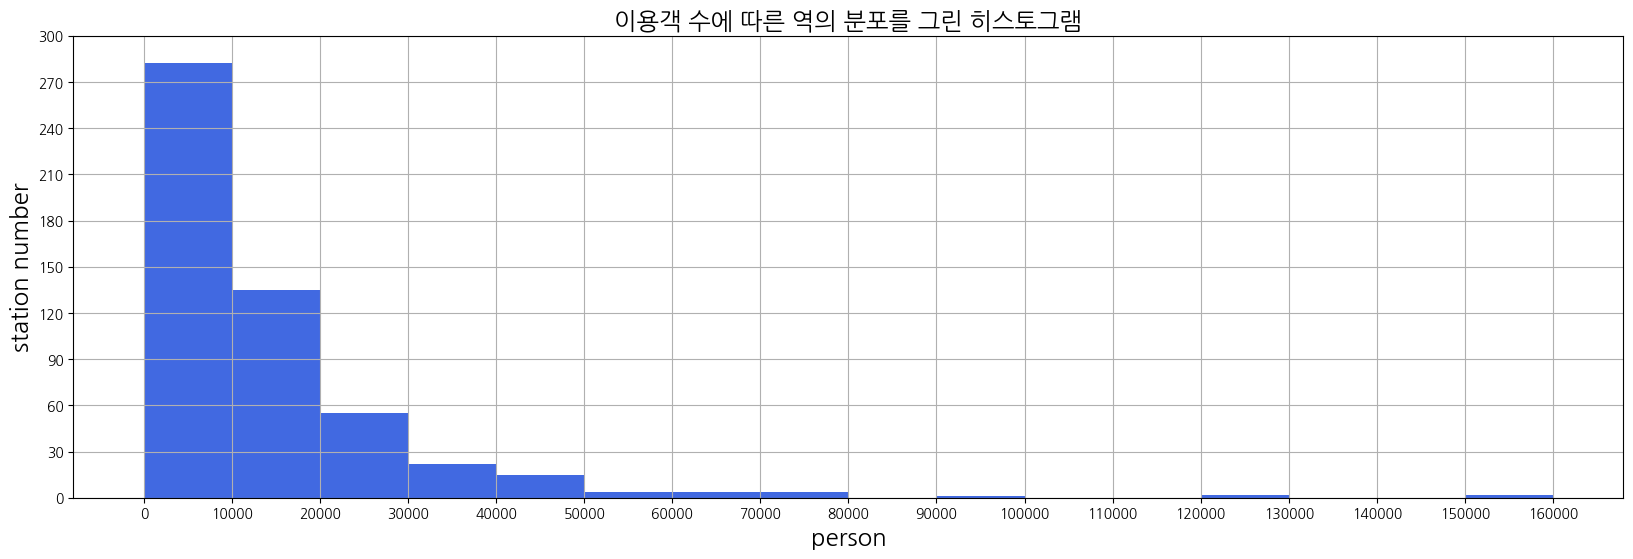

In [84]:
# 이용객 수의 분포를 히스토그램으로 시각화하기

fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(111)

#계급수를 25로 설정
ax.hist

ax.hist(result, bins = 16, range = (0, 160000), color = 'royalblue')
ax.set_xlabel('person', fontsize = 'xx-large')
ax.set_ylabel('station number', fontsize = 'xx-large')

#눈금 표시
ax.set_xticks(np.linspace(0,160000, 16+1))
ax.set_yticks(np.linspace(0,300,10+1))
ax.grid()

ax.set_title('이용객 수에 따른 역의 분포를 그린 히스토그램', fontsize = 'xx-large')

plt.show()